#  Approach: <font color='tomato'>Neural Network</font>

## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

## Loading Data

In [2]:
df = pd.read_csv("E://Telugu Character Recogniton//CSV_dataset//CSV_datasetsix_vowel_dataset_with_class.csv")
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,class
0,255,255,254,255,255,255,252,255,255,255,...,255,255,255,255,255,255,255,255,255,1
1,255,255,254,255,255,254,255,255,255,255,...,255,255,255,255,255,255,255,255,255,1
2,255,254,255,255,255,255,254,255,254,255,...,255,255,255,255,255,255,255,255,255,1
3,254,255,255,255,254,255,255,255,254,255,...,255,255,255,255,255,255,255,255,255,1
4,254,255,255,253,255,255,255,254,255,255,...,255,255,255,255,255,255,255,255,255,1


## Splitting data into 'train' and 'test'

In [3]:
pix=[]
for i in range(784):
    pix.append('pixel'+str(i))
features=pix
X = df.loc[:, features].values
y = df.loc[:,'class'].values

X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size = 0.30, random_state = 100)
y_train=y_train.ravel()
y_test=y_test.ravel()

## Seeing the Images in the dataset

In [4]:
def row2img(data):
    return np.asfarray(data).reshape((28,28))

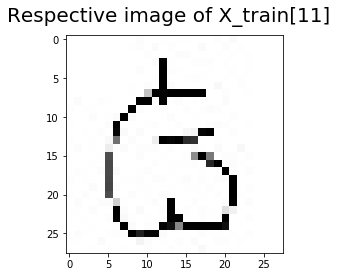

In [5]:
data=X_train[11]
f, ax1 = plt.subplots(1, 1, sharey=True)
f.suptitle('Respective image of X_train[11]', size='20')
ax1.imshow(255-row2img(data), cmap=plt.cm.binary);

## Normalize the dataset

In [6]:
X_train = tf.keras.utils.normalize(X_train,axis=1)
X_test = tf.keras.utils.normalize(X_test,axis=1)

## Building Neural Network

In [7]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(7,activation=tf.nn.softmax))

## Compiling Model

In [8]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
840/840 [==============================] - 0s 433us/step - loss: 1.8915 - acc: 0.1429
Epoch 2/50
840/840 [==============================] - 0s 83us/step - loss: 1.8065 - acc: 0.1536
Epoch 3/50
840/840 [==============================] - 0s 70us/step - loss: 1.8072 - acc: 0.1667
Epoch 4/50
840/840 [==============================] - 0s 98us/step - loss: 1.8044 - acc: 0.1810
Epoch 5/50
840/840 [==============================] - 0s 85us/step - loss: 1.7917 - acc: 0.1702
Epoch 6/50
840/840 [==============================] - 0s 81us/step - loss: 1.7776 - acc: 0.2000
Epoch 7/50
840/840 [==============================] - 0s 82us/step - loss: 1.7474 - acc: 0.2250
Epoch 8/50
840/840 [==============================] - 0s 82us/step - loss: 1.6130 - acc: 0.3440
Epoch 9/50
840/840 [==============================] - 0s 81us/step - loss: 1.3807 - acc: 0.4595
Epoch 10/50
840/840 [==============================] - 0s 81us/step - loss: 1.2045 - acc: 0.5012
Epoch 11/50
840/840 [=================

## Accuracy and Loss

In [10]:
_,acc=model.evaluate(X_test,y_test)
print('Accuracy: {}'.format(acc))

360/360 [==============================] - 0s 194us/step
Accuracy: 0.8277777777777777


## <font color='tomato'>Accuracy of the model is: </font><font color='MediumSpringGreen'>0.8472222222222222</font>

## Predict

In [11]:
pred=model.predict([X_test])
print('Predicted Label: ',np.argmax(pred[11]))

Predicted Label:  3


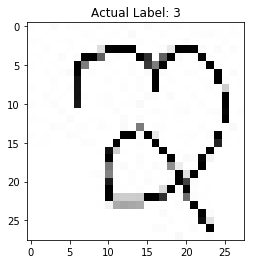

In [12]:
f, (ax1) = plt.subplots(1, 1, sharey=True)
ax1.set_title('Actual Label: '+str(y_test[11]))
ax1.imshow(255-row2img(X_test[11]),cmap=plt.cm.binary);


## Conclusion:
* <pre><font color='navy' face='lucida console'><strong>Since the Neural Networks needs lots of data for the training purpose.
  So the data that we have is not sufficient to train the model to get better reults when compared to the models like SVM and K-NNC.</strong></font></pre>